### Problem 2.2: Explore the $\theta$-rule for exponential growth
#### a)

In [2]:
import numpy as np
def solver(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0, T] with steps of dt."""
    Nt = int(T/dt)            # no of time intervals
    T = Nt*dt                 # adjust T to fit time step dt
    u = np.zeros(Nt+1)           # array of u[n] values
    t = np.linspace(0, T, Nt+1)  # time mesh
    u[0] = I                  # assign initial condition
    u[1:] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)
    u[:] = np.cumprod(u)
    return u, t

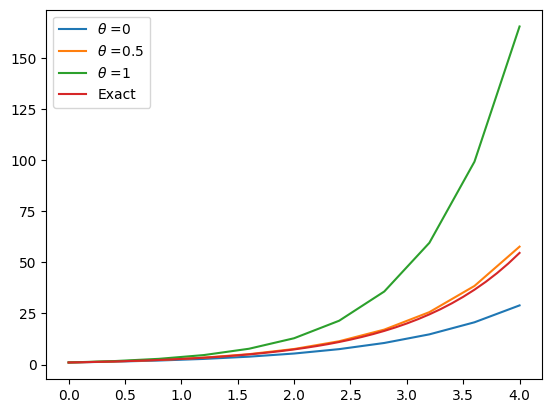

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

a = -1
thetas = [0, 0.5, 1]
T = 4
# dt = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
dt = 0.4
I = 1

for theta in thetas:
    u, t = solver(I, a, T, dt, theta)
    plt.plot(t, u, label=fr"$\theta$ ={theta}")

plt.plot(np.linspace(0,4,41), np.exp(np.linspace(0,4,41)), label="Exact")
plt.legend()
plt.show()

#### b)

In [13]:
def A_exact(p):
    return np.exp(p)


def A(p, theta):
    return (1 - (1 - theta) * (-p)) / (1 + theta * (-p))

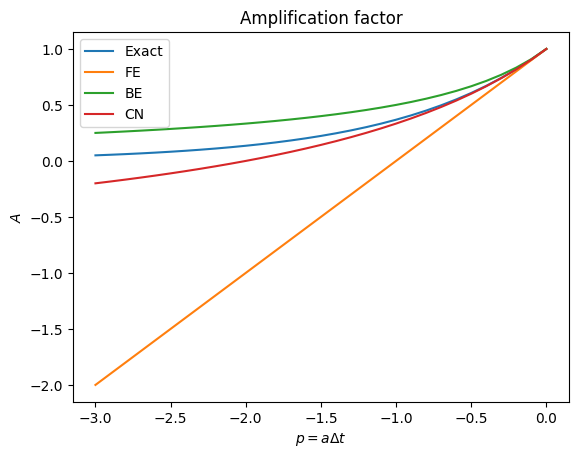

In [18]:
models = {'FE': 0, 'BE': 1, 'CN': 0.5}
thetas = [0, 0.5, 1]
a = -1
dt = np.linspace(0, 3, 31)
p = a*dt

plt.plot(p, A_exact(p), label="Exact")
for model, theta in models.items():
    plt.plot(p, A(p, theta), label=model)

plt.legend()
plt.xlabel(r"$p=a\Delta t$")
plt.ylabel(r"$A$")
plt.title("Amplification factor")
plt.show()